# WeatherPy
 

## Analysis

### Observed - December 22nd 2017

1. Random Selection from the range of coordinates:
   Lattitude between (-90, 90) 
   and 
   Longitude between (-180, 180) 
   gives the shape of the globe.
   
2. More than 60 countries have humidity 100%

3. Between (-20, 20) Lattitude, the Temperatures are in between 50F and 90F

4. High Wind Speed Bethel, US 35.57mph

In [91]:
# Dependencies
import json
import requests as req
from citipy import citipy 
import random as r 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv as cs
plt.style.use('ggplot')
from dateutil import parser
import datetime 

In [92]:
# created an API key in a file called 'apikey', 
# in the same directory as this notebook
filename = 'apikey'

In [97]:
# Creating a function to keep the apikey save and will not be pushed to github for protection.
def get_file_contents(filename):
    """ Given a filename,
        return the contents of that file
    """
    try:
        with open(filename, 'r') as f:
            # It's assumed our file contains a single line,
            # with our API key
            return f.read().strip()
    except FileNotFoundError:
        print("'%s' file not found" % filename)

In [94]:
api_key = get_file_contents(filename)
#print("Our API key is: %s" % (api_key))

In [95]:
# Save OpenWeatherMap developer API key and url 
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial' 

In [96]:
# defining Variables to store the extracted data in dictionary
 
city_name = [] 
country = []
date = [] 
lattitude = [] 
longitude =  []
Max_temp =  []
humidity =  []
cloudiness =  []
wind_speed =  []


In [4]:
# Generating random numbers with numpy.random.uniform() with different Lat and long  
#to collect the cities around the globe with all details 

lats = np.random.uniform(low=-90.0, high=90.0, size=(1800,))
lngs = np.random.uniform(low=-180.0, high=180.0, size=(1800,)) 
len(lats)

1800

In [5]:
coordinates = []
for i in range(len(lats)):
    coordinates.append((lats[i], lngs[i]))
    
#coordinates

In [6]:
# unique value set of cities
city_list = set()

for coord in coordinates:
    lat = coord[0] # first column lattitude
    lng = coord[1] # second column longittude
    
    city = citipy.nearest_city(lat, lng) # calling citipy to get the nearest city
    cityname = city.city_name
    city_list.add(cityname)

mycity_list = list(city_list) # convert the set to list
len(mycity_list)

719

In [7]:
 
#mycity_list

In [118]:
# This is to generate the url's for the given city to collect 
#the details from the openweathermap api
 
# also print out the url's for the verification

for city in mycity_list:
    # This is the plot I was using to debug my query, but I do not want to post it to github with my key in it.
    #print('City No ',mycity_list.index(city),' City Name is ',city)
    #print()
    query_url = url + "appid=" + api_key + "&q=" + str(city)+'&units=imperial'
    #print(query_url)
    #print()
    

# This is to collect all the details from openweathermap site using the above generated urls 

    # Get weather data
    owm_data = req.get(query_url).json()
    
     
    # Use try / except to skip any cities with errors
    try:
        country.append(owm_data['sys']['country'])
        date.append(owm_data['dt'])
        city_name.append(owm_data['name'])
        lattitude.append(owm_data['coord']['lat'])
        longitude.append(owm_data['coord']['lon'])
        Max_temp.append(owm_data['main']['temp'])
        cloudiness.append(owm_data['clouds']['all'])
        humidity.append(owm_data['main']['humidity'])
        wind_speed.append(owm_data['wind']['speed'])
        
    except:
        print("Error with city data. Skipping")
        continue

        
#print(own_data)    

In [9]:
#  This is to convert All the above collected list into a DataFrame

city_data = pd.DataFrame({'City ': city_name, 
                          'Cloudiness': cloudiness,
                          'Country': country,
                          'Date':date,
                          'Humidity':humidity,
                          'Lat':lattitude,
                          'Lng':longitude,
                          'Max_Temp':Max_temp,
                          'Wind_Speed':wind_speed})

In [10]:
# Printing all the values of the extracted data length 
print('city_name = ', len(city_name))
print('country = ', len(country) )
print('date = ', len(date))
print('lattitude = ', len(lattitude))
print('longitude = ', len(longitude) )
print('Max_temp = ', len(Max_temp))
print('humidity = ',  len(humidity))
print('cloudiness = ', len(cloudiness))
print('wind_speed = ', len(wind_speed))


city_name =  634
country =  634
date =  634
lattitude =  634
longitude =  634
Max_temp =  634
humidity =  634
cloudiness =  634
wind_speed =  634


In [11]:
# viewing the data frame 
city_data.reset_index()
city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,Samfya,44,ZM,1513966105,72,-11.37,29.56,73.92,6.85
1,Abu Dhabi,90,AE,1513963080,93,24.47,54.37,68.99,7.78
2,Itarema,64,BR,1513965904,72,-2.92,-39.92,84.76,16.69
3,Makokou,24,GA,1513966106,92,0.56,12.85,74.28,1.81
4,Kieta,92,PG,1513966107,100,-6.22,155.63,75.90,3.49


In [19]:
# Saving all my extracted data to the csv file 
city_data.to_csv('./extracted_api_city_data.csv')

In [12]:
# Print the json (pretty printed)
print(json.dumps(owm_data, indent=4, sort_keys=True))
 


{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 29.23,
        "lon": 56.61
    },
    "dt": 1513966406,
    "id": 390054,
    "main": {
        "grnd_level": 772.94,
        "humidity": 70,
        "pressure": 772.94,
        "sea_level": 1036.52,
        "temp": 26.4,
        "temp_max": 26.4,
        "temp_min": 26.4
    },
    "name": "Baft",
    "sys": {
        "country": "IR",
        "message": 0.0044,
        "sunrise": 1513911857,
        "sunset": 1513948848
    },
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 310.002,
        "speed": 1.86
    }
}


In [55]:
# I used the date time string to convert the date and time in python 
converted = datetime.datetime.fromtimestamp(1513966105).strftime('%c')
converted

'Fri Dec 22 10:08:25 2017'

In [81]:
# Finding observations of the max values for temperature 
city_data.loc[city_data['Max_Temp'] == city_data['Max_Temp'].max()]


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
98,Mapiripan,88,CO,1513965904,38,2.89,-72.13,92.28,11.54


In [82]:
# Finding observations of the max values for wind_speed
city_data.loc[city_data['Wind_Speed'] == city_data['Wind_Speed'].max()]
 

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
41,Bethel,40,US,1513961580,64,60.79,-161.76,39.2,35.57


In [83]:
# Finding observations of the max values for humidity
city_data.loc[city_data['Humidity'] == city_data['Humidity'].max()]

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
262,Seoul,90,KR,1513965480,363,37.57,126.98,40.06,3.38


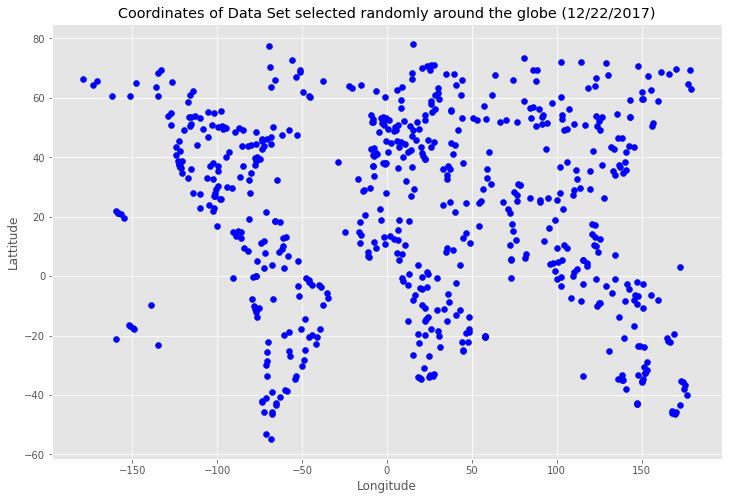

In [58]:
# This is to plot the diagram for Latitude Vs Longitude
 

plt.figure(figsize=(12,8))

plt.scatter(x=city_data['Lng'],y = city_data['Lat'], c='blue')
plt.xlabel('Longitude')
plt.ylabel('Lattitude')
plt.title('Coordinates of Data Set selected randomly around the globe (12/22/2017)')

# Save plot of Coordinates of Data Set selected randomly with Lat and long
plt.savefig("Coordinates_of_dataset.png")
plt.show()

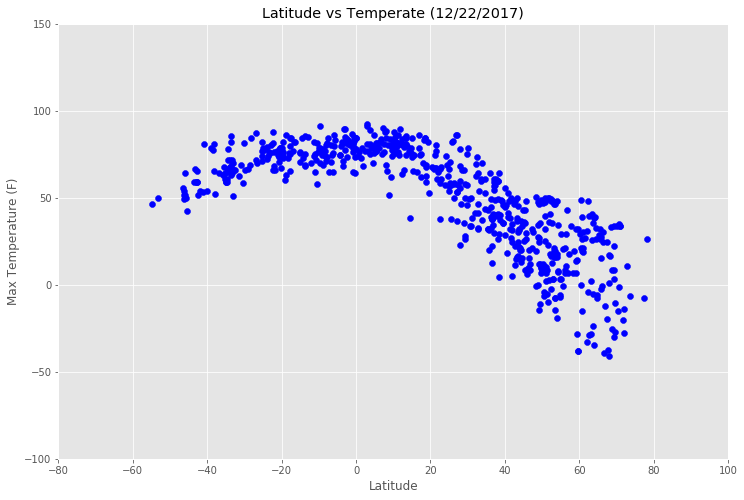

In [59]:
# This is to plot the diagram for Latitude Vs Temperate

plt.figure(figsize=(12,8))

plt.xlim(-80, 100)
plt.ylim(-100, 150)

plt.scatter(x=city_data['Lat'], y=city_data['Max_Temp'], c= 'blue')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Latitude vs Temperate (12/22/2017)')

# Save plot of Lattitude vs Longitude
plt.savefig("Lattitude_vs_Max_Temp.png")
plt.show()

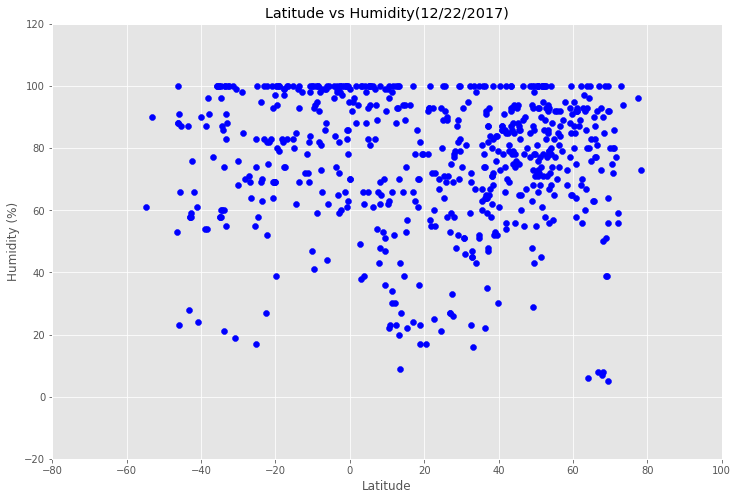

In [60]:
# This is to plot the diagram for Latitude Vs Temperate

plt.figure(figsize=(12,8))

plt.xlim(-80, 100)
plt.ylim(-20, 120)

plt.scatter(x=city_data['Lat'], y=city_data['Humidity'], c= 'blue')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs Humidity(12/22/2017)')

# Save plot of Lattitude vs Longitude
plt.savefig("Lattitude_vs_humidity.png")
plt.show()

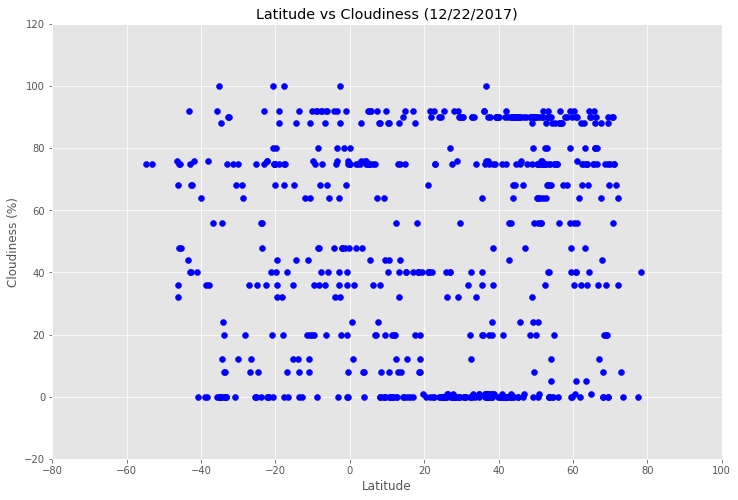

In [61]:
# This is to plot the diagram for Latitude Vs Temperate

plt.figure(figsize=(12,8))

plt.xlim(-80, 100)
plt.ylim(-20, 120)

plt.scatter(x=city_data['Lat'], y=city_data['Cloudiness'], c= 'blue')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Latitude vs Cloudiness (12/22/2017)' )

# Save plot of Lattitude vs Longitude
plt.savefig("Lattitude_vs_cloudiness.png")
plt.show()

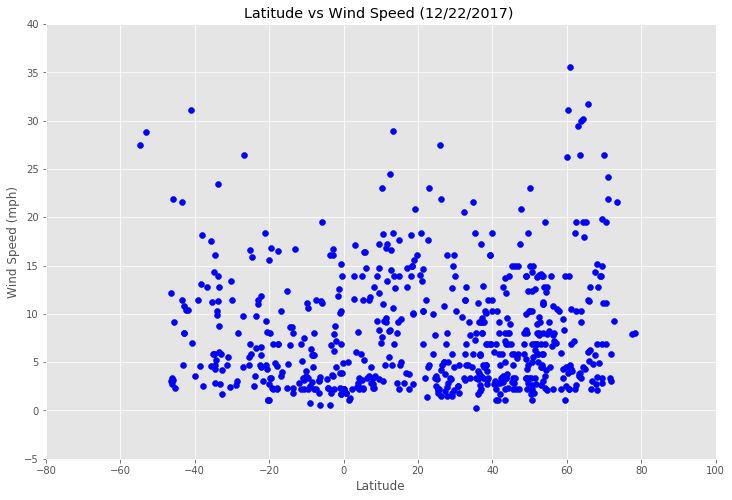

In [62]:
# This is to plot the diagram for Latitude Vs Temperate

plt.figure(figsize=(12,8))

plt.xlim(-80, 100)
plt.ylim(-5, 40)

plt.scatter(x=city_data['Lat'], y=city_data['Wind_Speed'], c= 'blue')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Latitude vs Wind Speed (12/22/2017) ')

# Save plot of Lattitude vs Longitude
plt.savefig("Lattitude_vs_wind_speed.png")
plt.show()